In [7]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import re
from collections import defaultdict
from sklearn.impute import SimpleImputer
import seaborn as sns

# DATA SET CREATION

### 1. dataset extraction

In [8]:
with open ('/tmp/pycharm_project_366/config.json', 'r', encoding='utf-8') as f:
    config = json.load(f)

#features_code_lists = config['features_code_lists']
features_name_list = config['features_name_list']
train_path = config['train_path']

In [9]:
train_df = pd.read_csv(train_path, low_memory=False)

In [10]:
features_code_dict = {}
features_with_array = defaultdict(lambda: 1)
with open('/tmp/pycharm_project_366/features_with_arrays.txt') as f:
    for line in f:
        feature_code, array_size = line.split()
        features_with_array[feature_code] = int(array_size)

with open('/tmp/pycharm_project_366/features.txt') as features_file:
    for line in features_file:
        feature_code, feature_name = line.split('\t')
        feature_name = feature_name.replace('\n', '')
        size = features_with_array[feature_code]
        for i in range(size):
            new_feature_code = f'{feature_code}-0.{i}'
            new_feature_name = f'{feature_name} - {i}'
            features_code_dict[new_feature_code] = new_feature_name

In [11]:
features_code_dict

{'eid-0.0': 'eid - 0',
 '41270-0.0': 'Diagnoses - ICD10 - 0',
 '41270-0.1': 'Diagnoses - ICD10 - 1',
 '41270-0.2': 'Diagnoses - ICD10 - 2',
 '41270-0.3': 'Diagnoses - ICD10 - 3',
 '41270-0.4': 'Diagnoses - ICD10 - 4',
 '41270-0.5': 'Diagnoses - ICD10 - 5',
 '41270-0.6': 'Diagnoses - ICD10 - 6',
 '41270-0.7': 'Diagnoses - ICD10 - 7',
 '41270-0.8': 'Diagnoses - ICD10 - 8',
 '41270-0.9': 'Diagnoses - ICD10 - 9',
 '41270-0.10': 'Diagnoses - ICD10 - 10',
 '41270-0.11': 'Diagnoses - ICD10 - 11',
 '41270-0.12': 'Diagnoses - ICD10 - 12',
 '41270-0.13': 'Diagnoses - ICD10 - 13',
 '41270-0.14': 'Diagnoses - ICD10 - 14',
 '41270-0.15': 'Diagnoses - ICD10 - 15',
 '41270-0.16': 'Diagnoses - ICD10 - 16',
 '41270-0.17': 'Diagnoses - ICD10 - 17',
 '41270-0.18': 'Diagnoses - ICD10 - 18',
 '41270-0.19': 'Diagnoses - ICD10 - 19',
 '41270-0.20': 'Diagnoses - ICD10 - 20',
 '41270-0.21': 'Diagnoses - ICD10 - 21',
 '41270-0.22': 'Diagnoses - ICD10 - 22',
 '41270-0.23': 'Diagnoses - ICD10 - 23',
 '41270-0.24'

In [11]:
train_df = train_df.rename(columns=features_code_dict)

In [12]:
train_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72464 entries, 0 to 72463
Data columns (total 284 columns):
 #    Column                                                                                             Non-Null Count  Dtype 
---   ------                                                                                             --------------  ----- 
 0    eid                                                                                                72464 non-null  object
 1    Yead of birth - 0                                                                                  72463 non-null  object
 2    Cancer year/age first occurred - 0                                                                 6570 non-null   object
 3    Duration of walks - 0                                                                              67425 non-null  object
 4    Number of days/week of moderate physical activity 10+ minutes - 0                                  72275 non-null  o

###     1.1 Get diabetes dataset

In [38]:
def get_people_with_disease(df, all_diseased_column, disease_code_pattern):
    people_with_disease_df = df[all_diseased_column.str.contains(disease_code_pattern)]

    return people_with_disease_df

In [40]:
diabetes_pattern = r'E11'
people_with_diabetes_df = get_people_with_disease(df_filled, all_diseased_column, diabetes_pattern)
people_with_diabetes_df.shape

52177

###    1.2 Get pancreatic cancer dataset

In [4]:
def get_people_with_2_diseases(df, first_disease_code_pattern, second_disease_code_pattern):
    people_with_disease_df = df[df['41202-0.0'].str.contains(first_disease_code_pattern) & df['41204-0.0'].str.contains(second_disease_code_pattern)]
    people_with_disease_df = pd.concat([people_with_disease_df, df[df['41204-0.0'].str.contains(first_disease_code_pattern) & df['41202-0.0'].str.contains(second_disease_code_pattern)]])

    return people_with_disease_df

In [61]:
sum = 0
for num in range(10):
    pancreatic_cancer_pattern = r'C25' + re.escape(str(num))
    people_with_pancreatic_cancer_df = get_people_with_disease(df_filled, all_diseased_column,pancreatic_cancer_pattern)
    sum += people_with_pancreatic_cancer_df.shape[0]
sum

2851

###    1.3 Get patients with both diabetes and pancreatic cancer dataset

In [ ]:
poeple_with_both_diseases = pd.merge([people_with_diabetes_df, people_with_pancreatic_cancer_df], how='inner')

###    1.4 Get test group dataset

In [ ]:
test_group_df = df.sample(n=100000)
train_group_df = df.drop(test_group_df.index)

In [59]:
diabetes_pattern = r'E11'
people_with_diabetes_df = get_people_with_disease(test_group_df, all_diseased_column, diabetes_pattern)
print(people_with_diabetes_df.shape)

/tmp/ipykernel_968599/2877151384.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  people_with_disease_df = df[all_diseased_column.str.contains(disease_code_pattern)]


(8651, 82)


/tmp/ipykernel_968599/2877151384.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  people_with_disease_df = df[all_diseased_column.str.contains(disease_code_pattern)]


(382, 82)

In [ ]:
pancreatic_cancer_pattern = r'C25'
people_with_pancreatic_cancer_df = get_people_with_disease(test_group_df, all_diseased_column,pancreatic_cancer_pattern)
people_with_pancreatic_cancer_df.shape

###    1.5 Merge and label datasets

In [55]:
people_with_diabetes_df['label'] = 1
people_with_pancreatic_cancer_df['label'] = 2
people_with_both_diseases['label'] = 3

KeyError: '20116-0.0'

# 2. FEATURE REPRESENTATION

### 2.1 Feature Preprocessing

todo!!

In [13]:
weird_patients = train_df[train_df['Yead of birth - 0'] == '34-0.0']
weird_patients

,eid,Yead of birth - 0,Cancer year/age first occurred - 0,Duration of walks - 0,Number of days/week of moderate physical activity 10+ minutes - 0,Duration of moderate activity - 0,Number of days/week of vigorous physical activity 10+ minutes - 0,Duration of vigorous activity - 0,Duration of strenuous sports - 0,Time spent watching television (TV) - 0,...,Cholesteryl Esters in LDL - 0,Cholesteryl Esters in HDL - 0,Free Cholesterol in VLDL - 0,Free Cholesterol in LDL - 0,Free Cholesterol in HDL - 0,Cholesterol in IDL - 0,Cholesteryl Esters in IDL - 0,Free Cholesterol in IDL - 0,Diagnoses,Label
1478,eid,34-0.0,84-0.0,874-0.0,884-0.0,894-0.0,904-0.0,914-0.0,1001-0.0,1070-0.0,...,23417-0.0,23418-0.0,23420-0.0,23421-0.0,23422-0.0,23526-0.0,23527-0.0,23528-0.0,Diagnoses,Label
2871,eid,34-0.0,84-0.0,874-0.0,884-0.0,894-0.0,904-0.0,914-0.0,1001-0.0,1070-0.0,...,23417-0.0,23418-0.0,23420-0.0,23421-0.0,23422-0.0,23526-0.0,23527-0.0,23528-0.0,Diagnoses,Label
4270,eid,34-0.0,84-0.0,874-0.0,884-0.0,894-0.0,904-0.0,914-0.0,1001-0.0,1070-0.0,...,23417-0.0,23418-0.0,23420-0.0,23421-0.0,23422-0.0,23526-0.0,23527-0.0,23528-0.0,Diagnoses,Label
5643,eid,34-0.0,84-0.0,874-0.0,884-0.0,894-0.0,904-0.0,914-0.0,1001-0.0,1070-0.0,...,23417-0.0,23418-0.0,23420-0.0,23421-0.0,23422-0.0,23526-0.0,23527-0.0,23528-0.0,Diagnoses,Label
7060,eid,34-0.0,84-0.0,874-0.0,884-0.0,894-0.0,904-0.0,914-0.0,1001-0.0,1070-0.0,...,23417-0.0,23418-0.0,23420-0.0,23421-0.0,23422-0.0,23526-0.0,23527-0.0,23528-0.0,Diagnoses,Label
8487,eid,34-0.0,84-0.0,874-0.0,884-0.0,894-0.0,904-0.0,914-0.0,1001-0.0,1070-0.0,...,23417-0.0,23418-0.0,23420-0.0,23421-0.0,23422-0.0,23526-0.0,23527-0.0,23528-0.0,Diagnoses,Label
9950,eid,34-0.0,84-0.0,874-0.0,884-0.0,894-0.0,904-0.0,914-0.0,1001-0.0,1070-0.0,...,23417-0.0,23418-0.0,23420-0.0,23421-0.0,23422-0.0,23526-0.0,23527-0.0,23528-0.0,Diagnoses,Label
11385,eid,34-0.0,84-0.0,874-0.0,884-0.0,894-0.0,904-0.0,914-0.0,1001-0.0,1070-0.0,...,23417-0.0,23418-0.0,23420-0.0,23421-0.0,23422-0.0,23526-0.0,23527-0.0,23528-0.0,Diagnoses,Label
12744,eid,34-0.0,84-0.0,874-0.0,884-0.0,894-0.0,904-0.0,914-0.0,1001-0.0,1070-0.0,...,23417-0.0,23418-0.0,23420-0.0,23421-0.0,23422-0.0,23526-0.0,23527-0.0,23528-0.0,Diagnoses,Label
14155,eid,34-0.0,84-0.0,874-0.0,884-0.0,894-0.0,904-0.0,914-0.0,1001-0.0,1070-0.0,...,23417-0.0,23418-0.0,23420-0.0,23421-0.0,23422-0.0,23526-0.0,23527-0.0,23528-0.0,Diagnoses,Label


In [14]:
train_df = train_df.drop(weird_patients.index)

In [15]:
with open('features_types.json') as f:
    features_types = json.load(f)
numerical_features = [f'{feature} - 0' for feature in features_types['numerical_features']]
categorical_features = [f'{feature} - 0' for feature in features_types['categorical_features']]

### 2.1.1 Fill nans for numerical values

In [87]:
mean_imputer = SimpleImputer(strategy='mean')

In [88]:
train_df[numerical_features] = mean_imputer.fit_transform(train_df[numerical_features])

ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: '2016-07-12'

### 2.1.2 Fill nans for categorical values

In [16]:
categorical_imputer = SimpleImputer(strategy='most_frequent')
train_df[categorical_features] = categorical_imputer.fit_transform(train_df[categorical_features])

### 2.1.3 Extract information from diagnoses

In [17]:
diseases_patterns = [
    ('Diabetes', r'E11'),
    ('Pancreatic Cancer', r'C25'),
    ('Obesity', r'E66'),
    ('Acute Pancreatitis', r'K85'),
    ('Alcoholic Liver Disease', r'K70'),
    ('Cirrhosis', r'K74'),
    ('Acute Hepatitis A', r'B15'),
    ('Acute Hepatitis B', r'B16'),
    ('Acute Hepatitis C', r'B171'),
    ('Toxic Liver Disease', r'K71'),
    ('Cushings Syndrome', r'E24'),
    ('Hyperthyroidism', r'E05'),
    ('Intestinal Malabsorption', r'K90'),
    ('Arterial Embolism and Thrombosis', r'I74')
]

In [18]:
def classify_disease(diseases_column, disease_pattern):
    return diseases_column.str.contains(disease_pattern)

In [19]:
patient_diseases = train_df['Diagnoses']
for disease, disease_pattern in diseases_patterns[2:]:
    train_df[f'Has {disease}'] = classify_disease(patient_diseases, disease_pattern)

In [20]:
train_df = train_df.drop(columns=['Diagnoses'])

In [21]:
train_df

,eid,Yead of birth - 0,Cancer year/age first occurred - 0,Duration of walks - 0,Number of days/week of moderate physical activity 10+ minutes - 0,Duration of moderate activity - 0,Number of days/week of vigorous physical activity 10+ minutes - 0,Duration of vigorous activity - 0,Duration of strenuous sports - 0,Time spent watching television (TV) - 0,...,Has Alcoholic Liver Disease,Has Cirrhosis,Has Acute Hepatitis A,Has Acute Hepatitis B,Has Acute Hepatitis C,Has Toxic Liver Disease,Has Cushings Syndrome,Has Hyperthyroidism,Has Intestinal Malabsorption,Has Arterial Embolism and Thrombosis
0,1042612,1948.0,NaN,30.0,7.0,60.0,4.0,30.0,3.0,5.0,...,False,False,False,False,False,False,False,False,False,False
1,1085780,1943.0,2008.0,20.0,0.0,NaN,0.0,NaN,3.0,1.0,...,False,False,False,False,False,False,False,False,False,False
2,1056843,1965.0,NaN,15.0,3.0,20.0,3.0,10.0,3.0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,1020608,1944.0,NaN,30.0,3.0,10.0,5.0,10.0,3.0,2.0,...,False,False,False,False,False,False,False,False,False,False
4,1033909,1947.0,NaN,NaN,3.0,30.0,0.0,NaN,3.0,3.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72459,6023669,1957,NaN,10.0,2.0,10.0,3.0,10.0,3.0,3.0,...,False,False,False,False,False,False,False,False,False,False
72460,6023754,1951,NaN,45.0,0.0,NaN,0.0,NaN,3.0,4.0,...,False,False,False,False,False,False,False,False,False,False
72461,6001401,1938,1999.0,15.0,4.0,45.0,0.0,NaN,3.0,4.0,...,False,False,False,False,False,False,False,True,False,False
72462,6003146,1942,NaN,15.0,0.0,NaN,0.0,NaN,3.0,4.0,...,False,False,False,False,False,False,False,False,False,False


### 2.1.4 Extract information from family

In [22]:
father_diagnosis_codes = [f'Illnesses of father - {i}' for i in range(10)]
mother_diagnosis_codes = [f'Illnesses of mother - {i}' for i in range(11)]
siblings_diagnosis_codes = [f'Illnesses of siblings - {i}' for i in range(12)]

In [23]:
father_diseases = train_df[father_diagnosis_codes].astype(str).agg(', '.join, axis=1)
mother_diseases = train_df[mother_diagnosis_codes].astype(str).agg(', '.join, axis=1)
siblings_diseases = train_df[siblings_diagnosis_codes].astype(str).agg(', '.join, axis=1)

In [24]:
for disease, disease_pattern in diseases_patterns:
    train_df[f'Father has {disease}'] = classify_disease(father_diseases, disease_pattern)

In [25]:
for disease, disease_pattern in diseases_patterns:
    train_df[f'Mother has {disease}'] = classify_disease(mother_diseases, disease_pattern)

In [26]:
for disease, disease_pattern in diseases_patterns:
    train_df[f'Siblings have {disease}'] = classify_disease(siblings_diseases, disease_pattern)

In [27]:
train_df = train_df.drop(columns=(father_diagnosis_codes + mother_diagnosis_codes + siblings_diagnosis_codes))

In [28]:
train_df

,eid,Yead of birth - 0,Cancer year/age first occurred - 0,Duration of walks - 0,Number of days/week of moderate physical activity 10+ minutes - 0,Duration of moderate activity - 0,Number of days/week of vigorous physical activity 10+ minutes - 0,Duration of vigorous activity - 0,Duration of strenuous sports - 0,Time spent watching television (TV) - 0,...,Siblings have Alcoholic Liver Disease,Siblings have Cirrhosis,Siblings have Acute Hepatitis A,Siblings have Acute Hepatitis B,Siblings have Acute Hepatitis C,Siblings have Toxic Liver Disease,Siblings have Cushings Syndrome,Siblings have Hyperthyroidism,Siblings have Intestinal Malabsorption,Siblings have Arterial Embolism and Thrombosis
0,1042612,1948.0,NaN,30.0,7.0,60.0,4.0,30.0,3.0,5.0,...,False,False,False,False,False,False,False,False,False,False
1,1085780,1943.0,2008.0,20.0,0.0,NaN,0.0,NaN,3.0,1.0,...,False,False,False,False,False,False,False,False,False,False
2,1056843,1965.0,NaN,15.0,3.0,20.0,3.0,10.0,3.0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,1020608,1944.0,NaN,30.0,3.0,10.0,5.0,10.0,3.0,2.0,...,False,False,False,False,False,False,False,False,False,False
4,1033909,1947.0,NaN,NaN,3.0,30.0,0.0,NaN,3.0,3.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72459,6023669,1957,NaN,10.0,2.0,10.0,3.0,10.0,3.0,3.0,...,False,False,False,False,False,False,False,False,False,False
72460,6023754,1951,NaN,45.0,0.0,NaN,0.0,NaN,3.0,4.0,...,False,False,False,False,False,False,False,False,False,False
72461,6001401,1938,1999.0,15.0,4.0,45.0,0.0,NaN,3.0,4.0,...,False,False,False,False,False,False,False,False,False,False
72462,6003146,1942,NaN,15.0,0.0,NaN,0.0,NaN,3.0,4.0,...,False,False,False,False,False,False,False,False,False,False


### 2.2 Feature analysis

### 2.2.1 feature plots

In [29]:
Label_dictionary = {0:'Control group', 1:'Pancreatic Cancer patients', 2:'Diabetes patients'}

def plot_categorical_feature(data):
    categorical_labels = data.iloc[:,1].unique()
    grouped_data = data.groupby([data.columns[0], data.columns[1]]).size().unstack(fill_value=0)
    #grouped_data = grouped_data.index.setnames(Label_dictionary)
    
    grouped_data.columns = categorical_labels
    
    grouped_data = grouped_data.reset_index()
    
    grouped_data.plot(x=data.columns[0], kind='bar', stacked=False, figsize=(10, 6))
    
    plt.xlabel(data.columns[1].capitalize())
    plt.ylabel('Number of People')
    plt.title(f'Number of People by {data.columns[0].capitalize()} and {data.columns[1].capitalize()}')
    plt.xticks(rotation=0)
    
    plt.legend(title='Category', labels=categorical_labels)
    plt.show()

In [58]:
def plot_continuous_feature(data, agg_func='mean'):
    
    grouped_data = data.groupby(data.columns[0])[data.columns[1]].agg(agg_func).reset_index()
    
    grouped_data.columns = [data.columns[0].capitalize(), f'{agg_func.capitalize()} of {data.columns[1].capitalize()}']
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=data.columns[1].capitalize(), y=f'{agg_func.capitalize()} of {data.columns[1].capitalize()}', data=grouped_data, palette='viridis')
    
    plt.xlabel(data.columns[0].capitalize())
    plt.ylabel(f'{agg_func.capitalize()} of {data.columns[1].capitalize()}')
    plt.title(f'{agg_func.capitalize()} of {data.columns[1].capitalize()} by {data.columns[0].capitalize()}')
    
    plt.show()

### 2.2.1.1 Quality of life

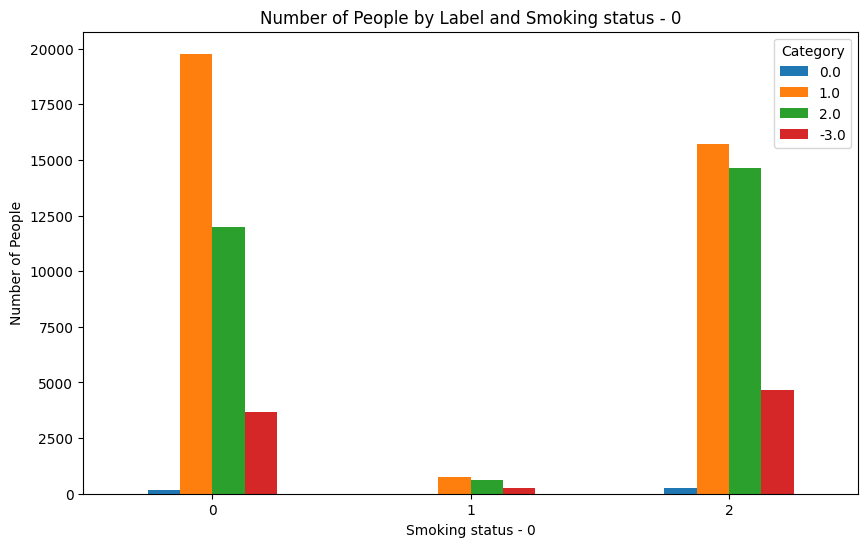

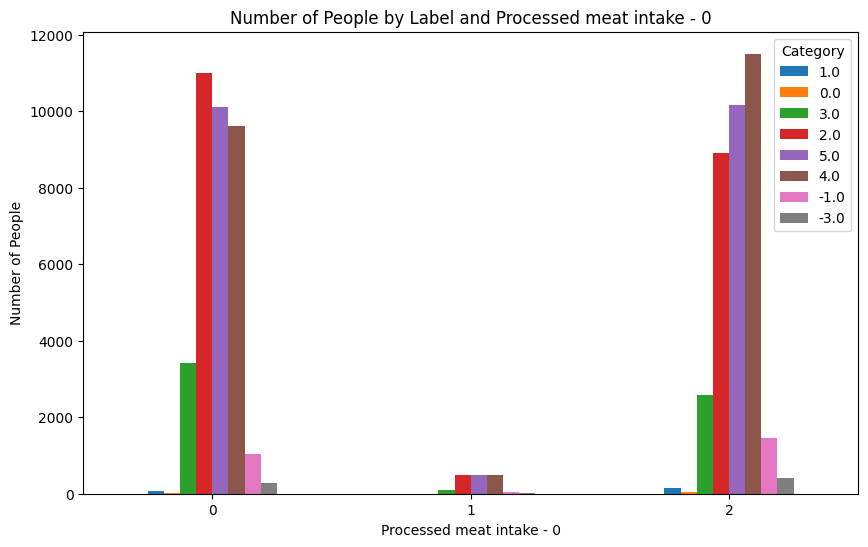

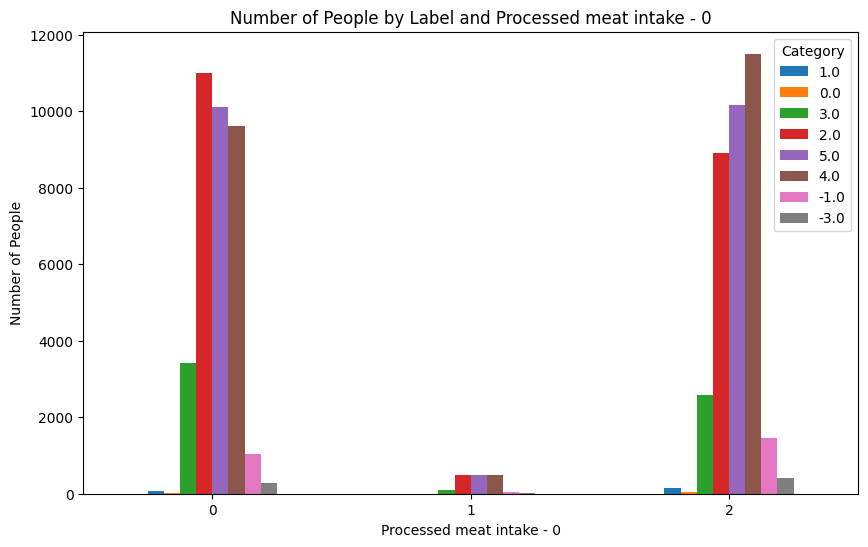

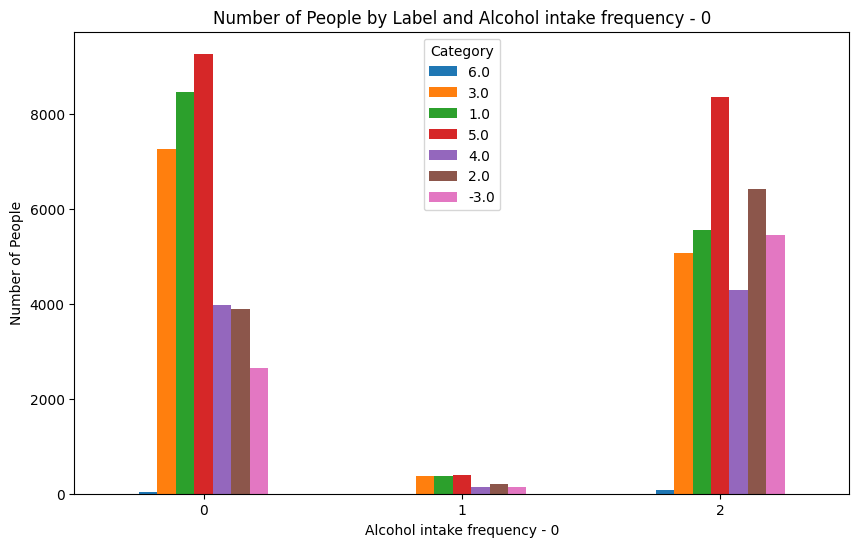

In [30]:
categorical_features_to_plot = ['Smoking Status', 'Processed meat intake', 'Processed meat intake', 'Alcohol intake frequency']
#continuous_features_to_plot = ['Time spent watching television (TV)', 'Time spent using computer', 'Duration of moderate activity','Overall quality of sleep in past month']

for feature in categorical_features_to_plot:
    plot_categorical_feature(train_df[['Label', f'{feature} - 0']])
#for feature in continuous_features_to_plot:
#    plot_categorical_feature(train_group_df[['Label', feature]])

In [ ]:


diabetes_smoking = people_with_diabetes_df['20116-0.0'].value_counts()
pancreatic_cancer_smoking = people_with_pancreatic_cancer_df['20116-0.0'].value_counts()

x_axis = np.arange(len(diabetes_smoking['20116-0.0']))

plt.bar(x_axis - 0.2, diabetes_smoking['counts'], 0.4, label='diabetes')
plt.bar(x_axis + 0.2, pancreatic_cancer_smoking['counts'], 0.4, label='pancreatic cancer')

plt.show()

In [ ]:
people_with_diabetes_df['20116-0.0'].value_counts().plot(kind='bar')
plt.show()
people_with_pancreatic_cancer_df['20116-0.0'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
people_with_diabetes_and_pancreatic_cancer_df = get_people_with_2_diseases(df_filled, diabetes_pattern, pancreatic_cancer_pattern)
people_with_diabetes_and_pancreatic_cancer_df

In [ ]:
temp = pd.read_csv(biobank_path, usecols=features_code_list)